<a href="https://colab.research.google.com/github/kevinalexanderwu/SELF-CHEF/blob/main/Binary_Classification_of_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
'drive/MyDrive/covid-detection/dataset/train',
image_size=(224,224),
batch_size=32,
validation_split=0.2,
subset='training',
seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
'drive/MyDrive/covid-detection/dataset/train',
image_size=(224,224),
batch_size=32,
validation_split=0.2,
subset='validation',
seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
'drive/MyDrive/covid-detection/dataset/test',
image_size=(224,224),
batch_size=32,
shuffle=False
)

train_ds = train_ds.map(lambda x,y: (x/255.0, y))
val_ds = val_ds.map(lambda x,y: (x/255.0, y))
test_ds = test_ds.map(lambda x,y: (x/255.0, y))

Found 5062 files belonging to 2 classes.
Using 4050 files for training.
Found 5062 files belonging to 2 classes.
Using 1012 files for validation.
Found 2170 files belonging to 2 classes.


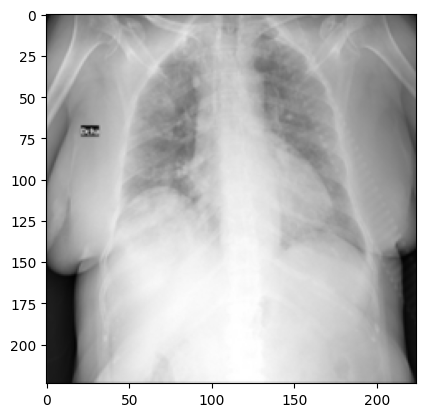

In [ ]:
for images, labels in train_ds.take(1):
  idx = random.randint(0, len(images) - 1)
plt.imshow(images[idx].numpy())
plt.show()

**MODEL**

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(train_ds, epochs=30)

Epoch 1/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9553 - loss: 0.1138
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.9639 - loss: 0.0931
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.9814 - loss: 0.0599
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.9826 - loss: 0.0488
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9908 - loss: 0.0301
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9968 - loss: 0.0144
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.9991 - loss: 0.0079
Epoch 8/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9910 - loss: 0.0276
Epoch 9/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9897 - loss: 0.0351
Epoch 10/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9735 - loss: 0.0611
Epoch 11/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9921 - loss: 0.0322
Epoch 12/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.evaluate(train_ds)
model.save('best_model.h5')

127/127 ━━━━━━━━━━━━━━━━━━━━ 87s 674ms/step - accuracy: 1.0000 - loss: 6.0411e-05


In [ ]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
print(cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885

Membuat Visualisasi Tambahan untuk Analisis Model

[1/7] Loading model dan data...


Found 2170 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



[2/7] Generating predictions...
68/68 ━━━━━━━━━━━━━━━━━━━━ 45s 664ms/step

[3/7] Membuat ROC Curve...
✓ ROC Curve saved: roc_curve.png
  AUC Score: 0.9237

[4/7] Membuat Precision-Recall Curve...
✓ Precision-Recall Curve saved: precision_recall_curve.png
  PR-AUC Score: 0.9330

[5/7] Membuat Classification Metrics Bar Chart...
✓ Metrics comparison saved: metrics_comparison.png

[6/7] Membuat Sample Predictions Visualization...
✓ Sample predictions saved: sample_predictions.png

[7/7] Membuat Threshold Analysis...
✓ Threshold analysis saved: threshold_analysis.png
  Optimal threshold: 0.121
  Max F1-Score: 0.8595

VISUALISASI SELESAI!

File yang dihasilkan:
1. roc_curve.png - ROC Curve & AUC
2. precision_recall_curve.png - Precision-Recall Curve
3. metrics_comparison.png - Bar chart metrics per class
4. sample_predictions.png - Contoh prediksi benar & salah
5. threshold_analysis.png - Analisis threshold optimal

Semua grafik siap untuk laporan/presentasi!


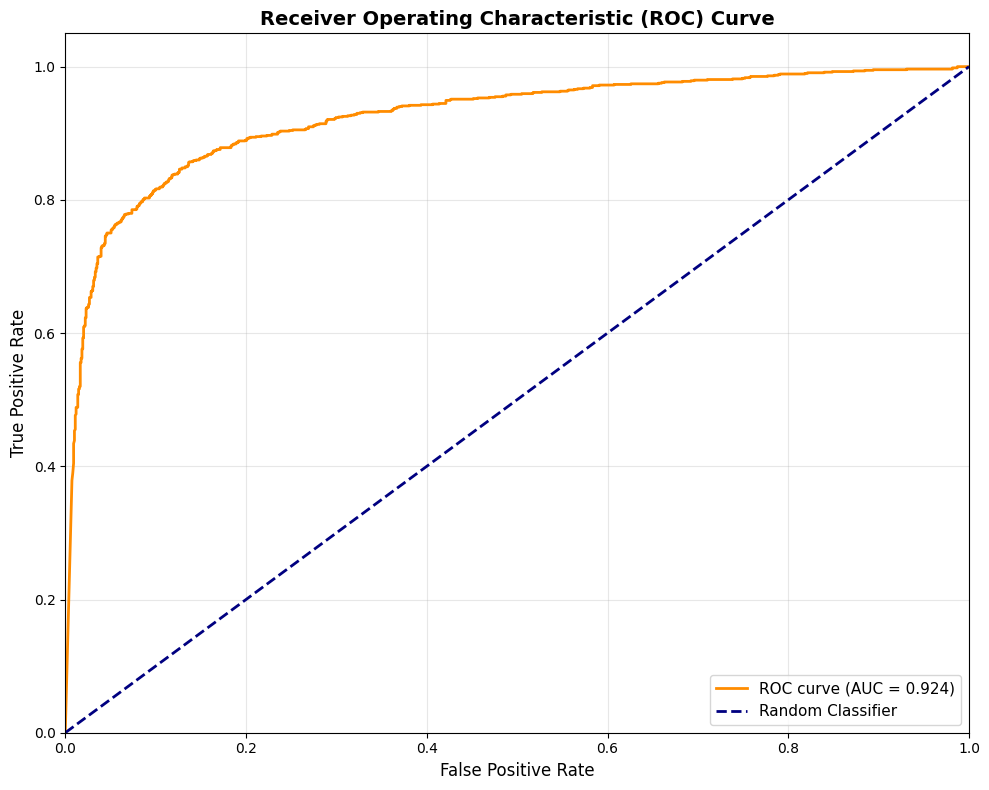

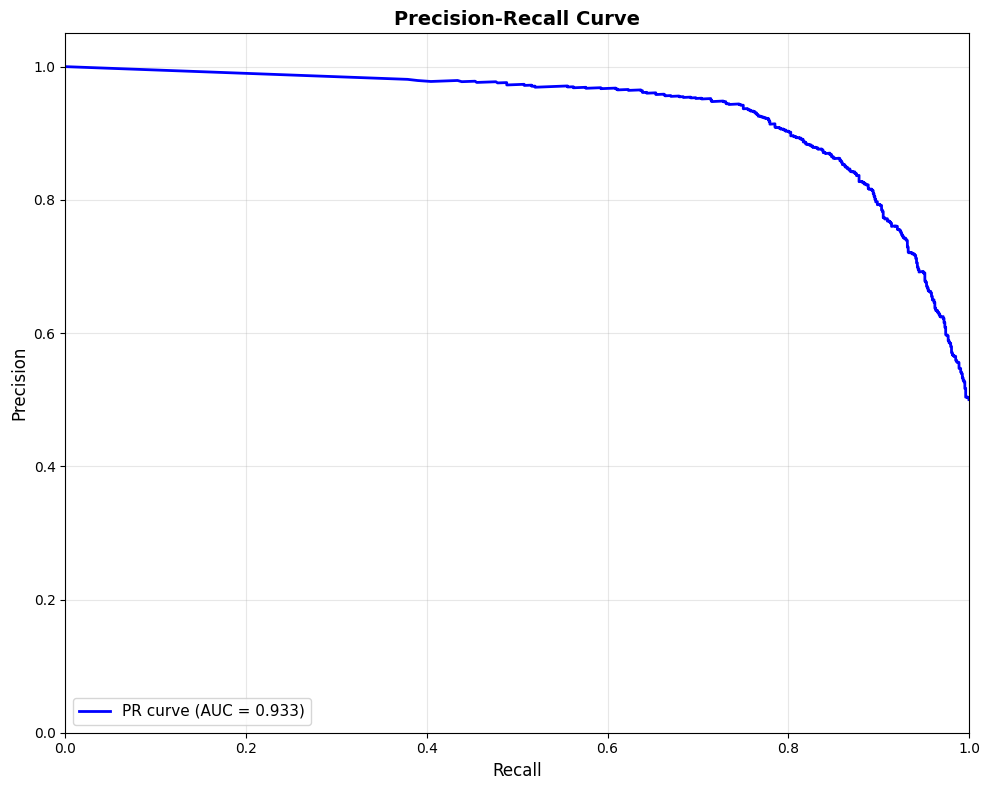

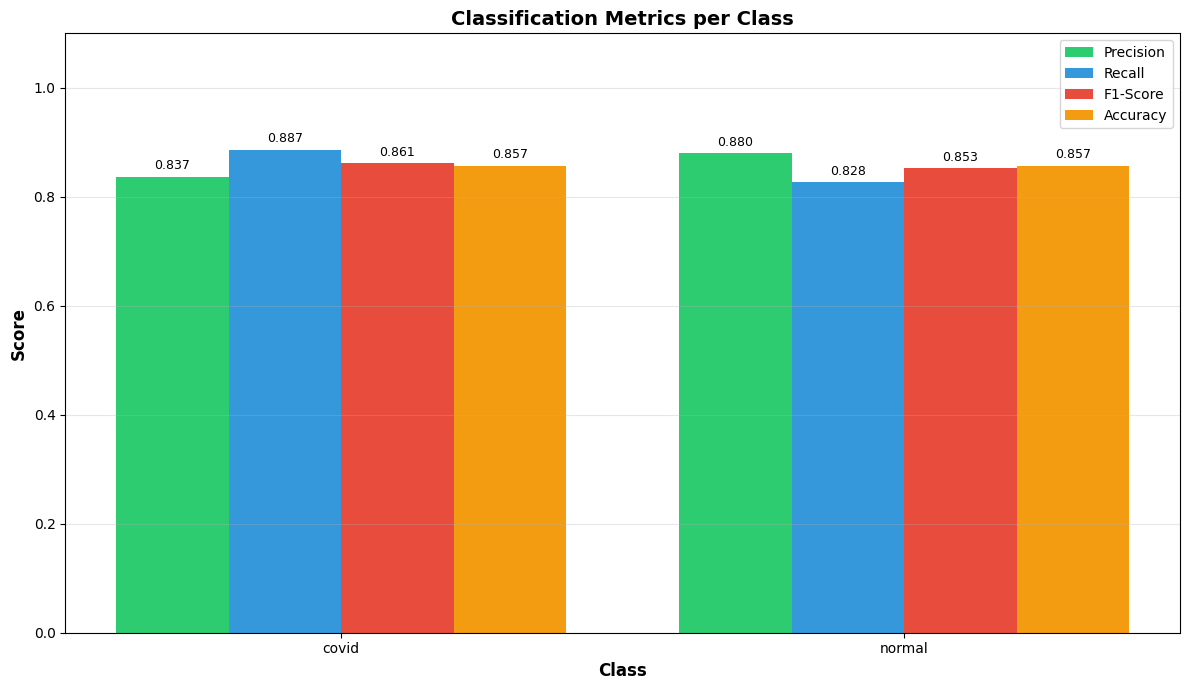

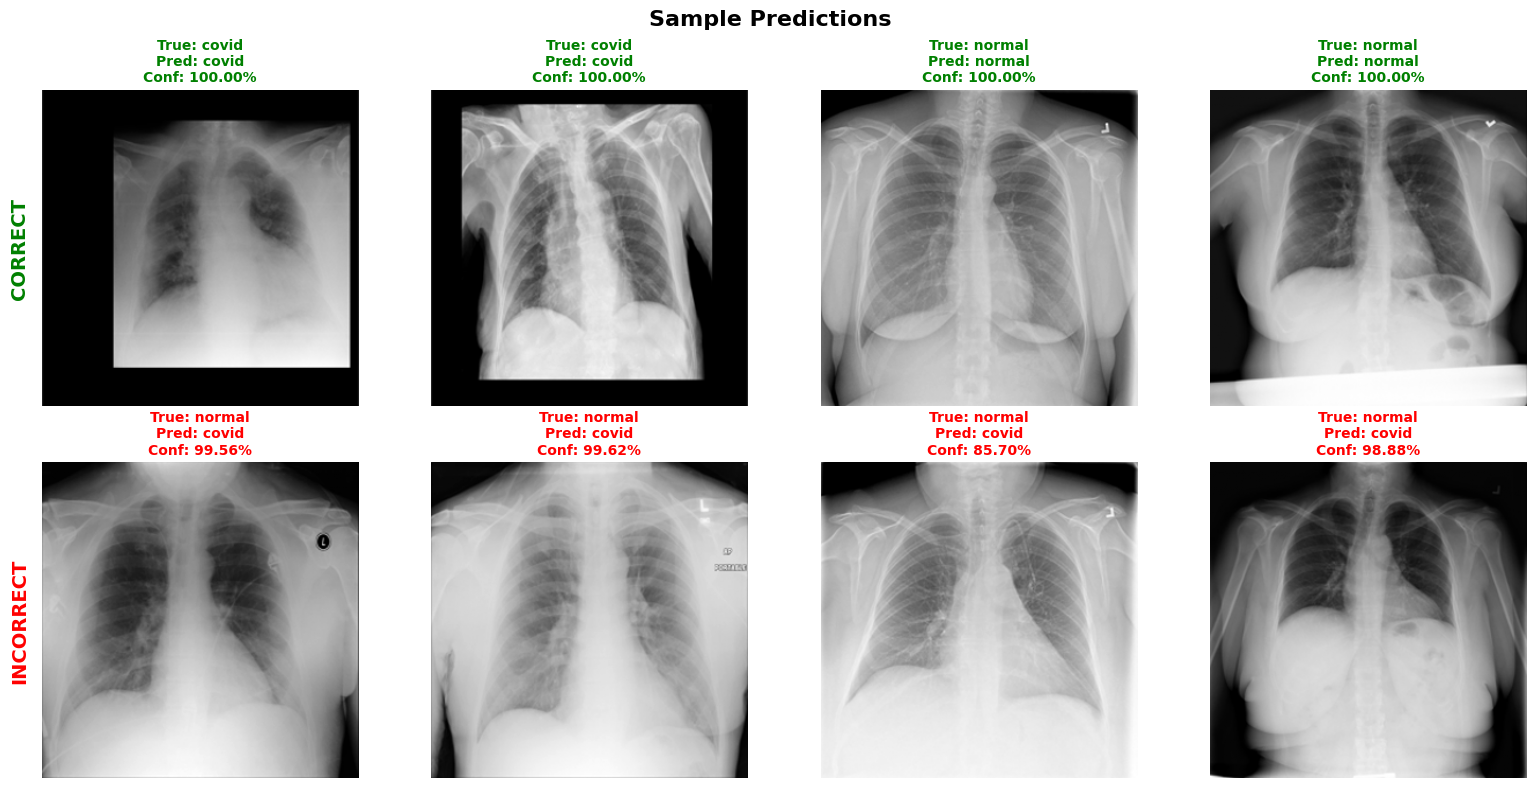

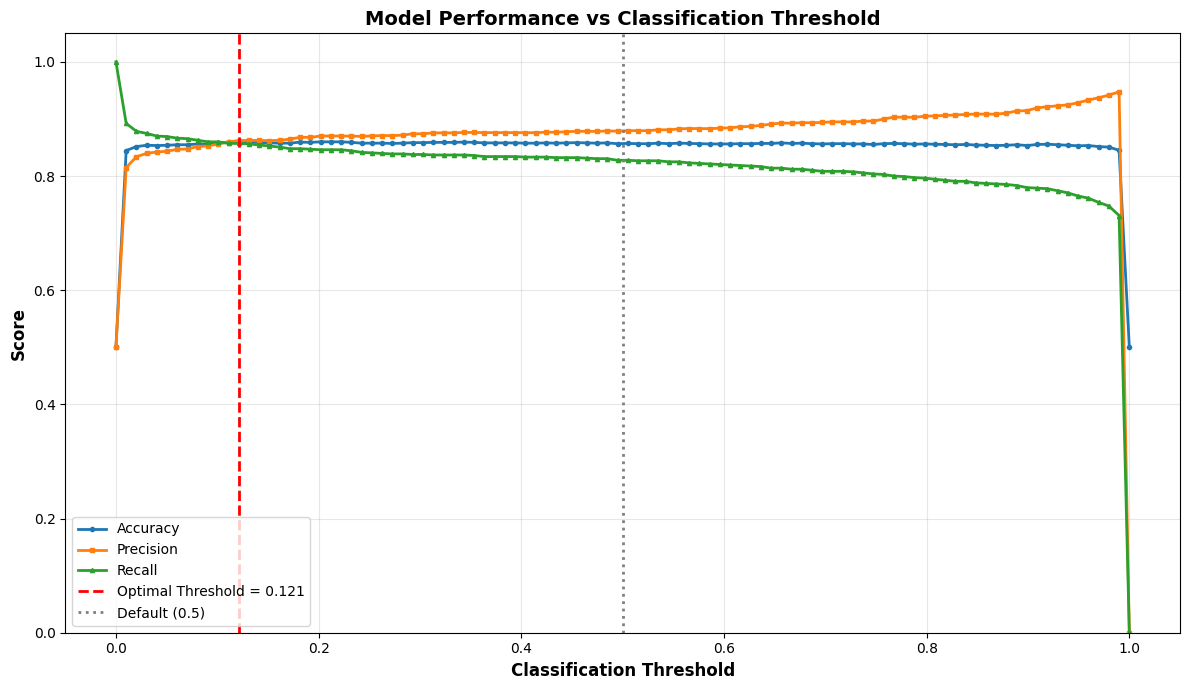

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import os

# ==================== KONFIGURASI ====================
MODEL_PATH = 'best_model.h5'  # atau 'covid_detection_model_final.h5'
TEST_DIR = 'drive/MyDrive/covid-detection/dataset/test'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

print("=" * 60)
print("Membuat Visualisasi Tambahan untuk Analisis Model")
print("=" * 60)

# ==================== LOAD MODEL & DATA ====================
print("\n[1/7] Loading model dan data...")

model = load_model(MODEL_PATH)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Get predictions
print("\n[2/7] Generating predictions...")
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_generator.classes
predicted_probs = predictions.flatten()

class_names = list(test_generator.class_indices.keys())

# ==================== GRAFIK 1: ROC CURVE ====================
print("\n[3/7] Membuat ROC Curve...")

fpr, tpr, thresholds = roc_curve(true_classes, predicted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve',
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
print("✓ ROC Curve saved: roc_curve.png")
print(f"  AUC Score: {roc_auc:.4f}")

# ==================== GRAFIK 2: PRECISION-RECALL CURVE ====================
print("\n[4/7] Membuat Precision-Recall Curve...")

precision, recall, pr_thresholds = precision_recall_curve(true_classes, predicted_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2,
         label=f'PR curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.savefig('precision_recall_curve.png', dpi=300, bbox_inches='tight')
print("✓ Precision-Recall Curve saved: precision_recall_curve.png")
print(f"  PR-AUC Score: {pr_auc:.4f}")

# ==================== GRAFIK 3: METRICS BAR CHART ====================
print("\n[5/7] Membuat Classification Metrics Bar Chart...")

# Calculate metrics per class
metrics = {
    'Accuracy': [accuracy_score(true_classes, predicted_classes)] * 2,
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for i, class_name in enumerate(class_names):
    class_mask = (true_classes == i)
    class_pred = (predicted_classes == i)

    metrics['Precision'].append(precision_score(class_mask, class_pred, zero_division=0))
    metrics['Recall'].append(recall_score(class_mask, class_pred, zero_division=0))
    metrics['F1-Score'].append(f1_score(class_mask, class_pred, zero_division=0))

# Create grouped bar chart
x = np.arange(len(class_names))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - 1.5*width, metrics['Precision'], width,
               label='Precision', color='#2ecc71')
bars2 = ax.bar(x - 0.5*width, metrics['Recall'], width,
               label='Recall', color='#3498db')
bars3 = ax.bar(x + 0.5*width, metrics['F1-Score'], width,
               label='F1-Score', color='#e74c3c')
bars4 = ax.bar(x + 1.5*width, metrics['Accuracy'], width,
               label='Accuracy', color='#f39c12')

# Add value labels on bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)

ax.set_xlabel('Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Classification Metrics per Class', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend(fontsize=10)
ax.set_ylim([0, 1.1])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Metrics comparison saved: metrics_comparison.png")

# ==================== GRAFIK 4: SAMPLE PREDICTIONS ====================
print("\n[6/7] Membuat Sample Predictions Visualization...")

# Get file paths
test_generator.reset()
filenames = test_generator.filenames

# Select samples: 4 correct, 4 incorrect
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Randomly sample
np.random.seed(42)
correct_samples = np.random.choice(correct_indices, min(4, len(correct_indices)), replace=False)
incorrect_samples = np.random.choice(incorrect_indices, min(4, len(incorrect_indices)), replace=False)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Sample Predictions', fontsize=16, fontweight='bold', y=0.98)

# Plot correct predictions
for idx, sample_idx in enumerate(correct_samples):
    img_path = os.path.join(TEST_DIR, filenames[sample_idx])
    img = plt.imread(img_path)

    true_label = class_names[true_classes[sample_idx]]
    pred_label = class_names[predicted_classes[sample_idx]]
    confidence = predicted_probs[sample_idx] if predicted_classes[sample_idx] == 1 else 1 - predicted_probs[sample_idx]

    axes[0, idx].imshow(img, cmap='gray')
    axes[0, idx].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2%}',
                           fontsize=10, color='green', fontweight='bold')
    axes[0, idx].axis('off')

axes[0, 0].text(-0.1, 0.5, 'CORRECT', transform=axes[0, 0].transAxes,
                fontsize=14, fontweight='bold', color='green',
                rotation=90, va='center')

# Plot incorrect predictions
for idx, sample_idx in enumerate(incorrect_samples):
    img_path = os.path.join(TEST_DIR, filenames[sample_idx])
    img = plt.imread(img_path)

    true_label = class_names[true_classes[sample_idx]]
    pred_label = class_names[predicted_classes[sample_idx]]
    confidence = predicted_probs[sample_idx] if predicted_classes[sample_idx] == 1 else 1 - predicted_probs[sample_idx]

    axes[1, idx].imshow(img, cmap='gray')
    axes[1, idx].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2%}',
                           fontsize=10, color='red', fontweight='bold')
    axes[1, idx].axis('off')

axes[1, 0].text(-0.1, 0.5, 'INCORRECT', transform=axes[1, 0].transAxes,
                fontsize=14, fontweight='bold', color='red',
                rotation=90, va='center')

plt.tight_layout()
plt.savefig('sample_predictions.png', dpi=300, bbox_inches='tight')
print("✓ Sample predictions saved: sample_predictions.png")

# ==================== GRAFIK 5: THRESHOLD ANALYSIS ====================
print("\n[7/7] Membuat Threshold Analysis...")

thresholds_to_test = np.linspace(0, 1, 100)
accuracies = []
precisions = []
recalls = []

for thresh in thresholds_to_test:
    preds = (predicted_probs > thresh).astype(int)
    accuracies.append(accuracy_score(true_classes, preds))
    precisions.append(precision_score(true_classes, preds, zero_division=0))
    recalls.append(recall_score(true_classes, preds, zero_division=0))

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(thresholds_to_test, accuracies, label='Accuracy', linewidth=2, marker='o', markersize=3)
ax.plot(thresholds_to_test, precisions, label='Precision', linewidth=2, marker='s', markersize=3)
ax.plot(thresholds_to_test, recalls, label='Recall', linewidth=2, marker='^', markersize=3)

# Mark optimal threshold (max F1)
f1_scores = 2 * (np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls) + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_to_test[optimal_idx]

ax.axvline(x=optimal_threshold, color='red', linestyle='--', linewidth=2,
           label=f'Optimal Threshold = {optimal_threshold:.3f}')
ax.axvline(x=0.5, color='gray', linestyle=':', linewidth=2, label='Default (0.5)')

ax.set_xlabel('Classification Threshold', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance vs Classification Threshold', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1.05])

plt.tight_layout()
plt.savefig('threshold_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Threshold analysis saved: threshold_analysis.png")
print(f"  Optimal threshold: {optimal_threshold:.3f}")
print(f"  Max F1-Score: {f1_scores[optimal_idx]:.4f}")

# ==================== SUMMARY ====================
print("\n" + "=" * 60)
print("VISUALISASI SELESAI!")
print("=" * 60)
print("\nFile yang dihasilkan:")
print("1. roc_curve.png - ROC Curve & AUC")
print("2. precision_recall_curve.png - Precision-Recall Curve")
print("3. metrics_comparison.png - Bar chart metrics per class")
print("4. sample_predictions.png - Contoh prediksi benar & salah")
print("5. threshold_analysis.png - Analisis threshold optimal")
print("\nSemua grafik siap untuk laporan/presentasi!")
print("=" * 60)